In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Pokémon sightings

In [2]:
#df = pd.read_csv('movies_plot.csv')
fifa = pd.read_csv('fifa_18_sample_data.csv')

fifa.columns

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)

In [3]:
fifa.describe()

,ID,special,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,9.390000e+02,1000.000000,1000.000000,...,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,113.000000
mean,185173.438000,1885.120000,27.330000,182.229000,77.169000,1.788405e+07,69432.000000,3.476102e+07,80.404000,82.365000,...,65.036077,67.153326,68.455468,70.618940,72.220970,72.617813,72.166855,68.466742,65.036077,80.752212
std,35067.704145,266.410323,3.654375,6.939504,7.452515,1.369776e+07,62034.277844,2.705161e+07,2.917412,3.663222,...,13.669133,9.664762,8.157728,8.085966,9.119144,8.910354,6.503281,9.731889,13.669133,3.129728
min,41.000000,1081.000000,18.000000,163.000000,58.000000,0.000000e+00,0.000000,1.400000e+06,77.000000,77.000000,...,34.000000,43.000000,46.000000,46.000000,44.000000,42.000000,46.000000,46.000000,34.000000,77.000000
25%,177120.000000,1836.500000,25.000000,178.000000,72.000000,1.000000e+07,29000.000000,1.860000e+07,78.000000,79.000000,...,51.000000,58.000000,62.000000,67.000000,68.000000,69.000000,69.000000,59.000000,51.000000,78.000000
50%,191387.500000,1964.000000,27.000000,183.000000,77.000000,1.400000e+07,53000.000000,2.660000e+07,80.000000,82.000000,...,70.000000,70.000000,70.000000,73.000000,75.000000,76.000000,73.000000,72.000000,70.000000,80.000000
75%,204620.000000,2060.000000,30.000000,187.000000,82.000000,2.112500e+07,87250.000000,4.250000e+07,82.000000,85.000000,...,77.000000,75.000000,75.000000,76.000000,78.000000,78.000000,77.000000,77.000000,77.000000,82.000000
max,232226.000000,2291.000000,39.000000,201.000000,99.000000,1.230000e+08,565000.000000,2.368000e+08,94.000000,94.000000,...,87.000000,84.000000,85.000000,92.000000,92.000000,92.000000,87.000000,85.000000,87.000000,92.000000


In [4]:
fifa.isnull().sum()

ID              0
name            0
full_name       0
club           10
club_logo      10
               ..
prefers_lam     0
prefers_lcm     0
prefers_ldm     0
prefers_lcb     0
prefers_gk      0
Length: 185, dtype: int64

In [11]:
fifa.describe()

,ID,special,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,...,lwb,ls,lf,lam,lcm,ldm,lcb,gk,scaled_wage,scaled_value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,9.390000e+02,1000.000000,1000.000000,...,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,113.000000,1000.000000,1000.000000
mean,185173.438000,1885.120000,27.330000,182.229000,77.169000,1.788405e+07,69432.000000,3.476102e+07,80.404000,82.365000,...,68.455468,70.618940,72.220970,72.617813,72.166855,68.466742,65.036077,80.752212,1.119812,1.306272
std,35067.704145,266.410323,3.654375,6.939504,7.452515,1.369776e+07,62034.277844,2.705161e+07,2.917412,3.663222,...,8.157728,8.085966,9.119144,8.910354,6.503281,9.731889,13.669133,3.129728,1.000500,1.000500
min,41.000000,1081.000000,18.000000,163.000000,58.000000,0.000000e+00,0.000000,1.400000e+06,77.000000,77.000000,...,46.000000,46.000000,44.000000,42.000000,46.000000,46.000000,34.000000,77.000000,0.000000,0.000000
25%,177120.000000,1836.500000,25.000000,178.000000,72.000000,1.000000e+07,29000.000000,1.860000e+07,78.000000,79.000000,...,62.000000,67.000000,68.000000,69.000000,69.000000,59.000000,51.000000,78.000000,0.467717,0.730412
50%,191387.500000,1964.000000,27.000000,183.000000,77.000000,1.400000e+07,53000.000000,2.660000e+07,80.000000,82.000000,...,70.000000,73.000000,75.000000,76.000000,73.000000,72.000000,70.000000,80.000000,0.854794,1.022576
75%,204620.000000,2060.000000,30.000000,187.000000,82.000000,2.112500e+07,87250.000000,4.250000e+07,82.000000,85.000000,...,75.000000,76.000000,78.000000,78.000000,77.000000,77.000000,77.000000,82.000000,1.407184,1.542995
max,232226.000000,2291.000000,39.000000,201.000000,99.000000,1.230000e+08,565000.000000,2.368000e+08,94.000000,94.000000,...,85.000000,92.000000,92.000000,92.000000,87.000000,85.000000,87.000000,92.000000,9.112425,8.984064


In [12]:
fifa.drop_duplicates()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,scaled_wage,scaled_value
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,9.112425,6.975431
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,9.112425,7.669323
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,4.515892,8.984064
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,8.225375,7.084993
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,True,3.709483,4.455511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,Martín Montoya Torralbo,Valencia CF,https://cdn.sofifa.org/18/teams/461.png,2040,26,Spanish Primera División,1991-04-14,175.0,...,False,False,False,False,False,False,False,False,0.499974,0.657371
996,160087,L. Dalsaro,Lucas Dalsaro,Colo-Colo,https://cdn.sofifa.org/18/teams/110980.png,2009,25,Chilian Primera División,1992-02-29,187.0,...,False,False,False,False,False,False,False,False,0.129025,0.584329
997,31831,K. Källström,Kim Källström,Djurgårdens IF,https://cdn.sofifa.org/18/teams/710.png,2005,34,Swedish Allsvenskan,1982-08-24,185.0,...,False,False,False,False,False,False,False,False,0.145154,0.314077
998,204120,T. Vaclík,Tomáš Vaclík,FC Basel,https://cdn.sofifa.org/18/teams/896.png,1206,28,Swiss Super League,1989-03-29,188.0,...,False,False,False,False,False,False,False,True,0.516102,0.511288


## Normalize basic list data

In [5]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


## Visualize normalized data
After normalizing your data, we can compare the scaled data to the original data to see the difference. 

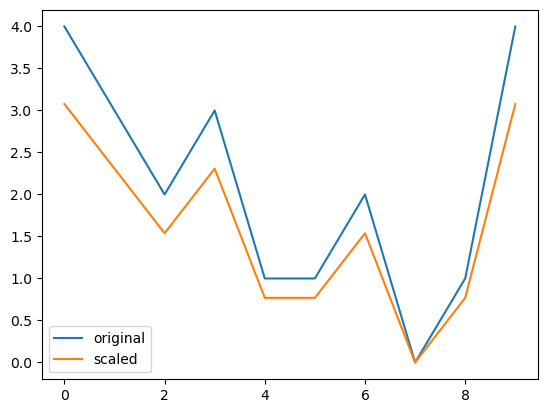

In [6]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

## Normalization of small numbers
From above, we have normalization of whole numbers. Given below we will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. 

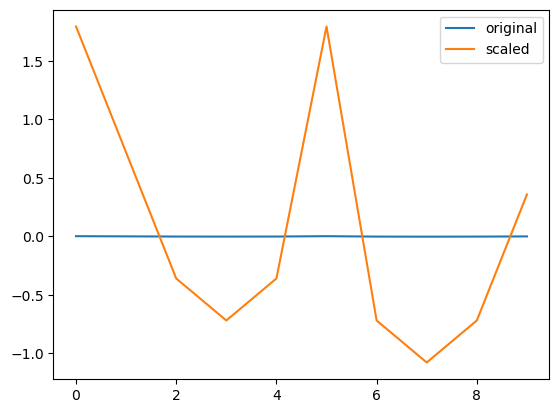

In [7]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

## FIFA 18: Normalize data
FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that we are about to work on contains data on the 1000 top individual players in the game. We will explore various features of the data as we move ahead in the course.  We will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

In [8]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

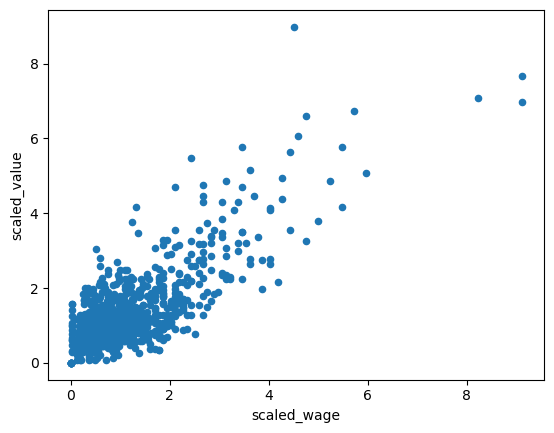

In [9]:
# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()


In [10]:
# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064
